In [1]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#load data
#world_cup = pd.read_csv('datasets/World Cup 2018 Dataset.csv')
#results = pd.read_csv('datasets/results.csv')

#load data 
world_cup = pd.read_csv('datasets/World Cup 2018 Dataset.csv')
results = pd.read_csv('datasets/results.csv')

In [3]:
#inspect the first 10 rows of the world cup data set
world_cup.head(10)

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN
5,Spain,B,14.0,1.0,1.0,2.0,6.0,Portugal,3.0,12.0,31.0,Iran,20.0,NaN,NaN,Morocco,36.0,5.0,7.0,NaN
6,Morocco,B,4.0,0.0,0.0,0.0,40.0,Iran,4.0,-2.0,-2.0,Portugal,19.0,1.0,2.0,Spain,36.0,-5.0,-7.0,NaN
7,IRAN,B,4.0,0.0,0.0,0.0,32.0,Morocco,4.0,2.0,2.0,Spain,20.0,NaN,NaN,Portugal,35.0,-2.0,-5.0,NaN
8,France,C,14.0,1.0,2.0,5.0,9.0,Australia,5.0,1.0,6.0,Peru,21.0,-1.0,-1.0,Denmark,37.0,4.0,9.0,NaN
9,Australia,C,4.0,0.0,0.0,0.0,39.0,France,5.0,-1.0,-6.0,Denmark,22.0,-1.0,-3.0,Peru,38.0,NaN,NaN,NaN


In [4]:
#ispect the first 10 rows of the results data set
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [5]:
#adding goal difference and establishing who is the winner
#winner = []
#for i in range (len(results['home_team'])):
#    if results ['home_score'][i] > results['away_score'][i]:
#        winner.append(results['home_team'][i])
#    elif results ['home_score'][i] < results['away_score'][i]:
#        winner.append(results['away_team'][i])
#    else:
#        winner.append('Draw')
#results['winning_team'] = winner

#adding goal difference column
#results ['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

#results.head()

#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [6]:
#working with a subset of data to include Nigeria in a Nigeria dataframe
#df = results [(results['home_team'] == 'Nigeria') | (results['away_team'] == 'Nigeria')]
#nigeria = df.iloc[:]
#nigeria.head()

#lets work with a subset of the data one that includes games played by Nigeria in a Nigeria dataframe
df = results[(results['home_team'] == 'Nigeria') | (results['away_team'] == 'Nigeria')]
nigeria = df.iloc[:]
nigeria.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
2977,1949-10-08,Sierra Leone,Nigeria,0,2,Friendly,Freetown,Sierra Leone,False,Nigeria,2
3050,1950-05-28,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,False,Ghana,1
3219,1951-10-20,Nigeria,Ghana,5,0,Friendly,Lagos,Nigeria,False,Nigeria,5
3492,1953-10-11,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,False,Ghana,1
3654,1954-10-30,Nigeria,Ghana,3,0,Friendly,Lagos,Nigeria,False,Nigeria,3


In [7]:
# create a column for year. The first world cup was held in 1930
# year = []
# for row in nigeria['date']:
#     year.append(int(row[:4]))
# nigeria ['match_year'] = year
# nigeria_1930 = nigeria[nigeria.match_year >= 1930]
# nigeria_1930.count


#creating a column for year and the first world cup was held in 1930#creati 
year = []
for row in nigeria['date']:
    year.append(int(row[:4]))
nigeria ['match_year']= year
nigeria_1930 = nigeria[nigeria.match_year >= 1930]
nigeria_1930.count()

date               545
home_team          545
away_team          545
home_score         545
away_score         545
tournament         545
city               545
country            545
neutral            545
winning_team       545
goal_difference    545
match_year         545
dtype: int64

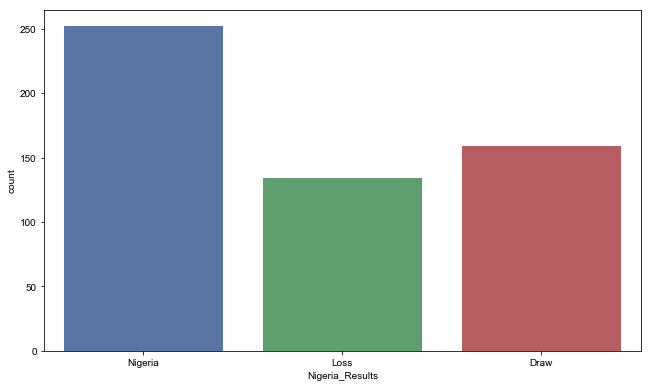

In [8]:
#what is the common game outcome for nigeria visualisation#what i 
wins = []
for row in nigeria_1930['winning_team']:
    if row != 'Nigeria' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Nigeria_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Nigeria_Results', data=winsdf)

In [ ]:
# wins is a good metric to analyze and predict outcomes of matches in the tournament 
#tournament and venue won't add much to our predictions
#historical match records will be used

In [9]:
# narrowing to teams participating in the 2018 world cup
# worldcup_teams = ['Egypt','Russia','Saudi Arabia','Uruguay','Iran','Morocco','Portugal','Spain','Australia','Denmark','France','Peru','Argentina','Croatia','Iceland','Nigeria','Brazil','Costa Rica','Serbia','Switzerland','Germany','Mexico','South Korea','Sweden','Belgium','England','Panama','Tunisia','Colombia','Japan','Poland','Senegal']

# create a dataframe for each team in the 2018 WC and drop duplicates
# df_teams_home = results[results['home_team'].isin(worldcup_teams)]
# df_teams_away = results[results['away_team'].isin(worldcup_teams)]
# df_teams = pd.concat((df_teams_home, df_teams_away))
# df_teams.drop_duplicates()
# df_teams.count()

#narrowing to team patcipating in the world cup#narrowi 
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               20662
home_team          20662
away_team          20662
home_score         20662
away_score         20662
tournament         20662
city               20662
country            20662
neutral            20662
winning_team       20662
goal_difference    20662
dtype: int64

In [10]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,England,1


In [11]:
## create a year column and drop games before 1930
# year = []
# for row in df_teams['date']:
#     year.append(int(row[:4]))
# df_teams['match_year'] = year
# df_teams_1930 = df_teams[df_teams.match_year >= 1930]
# df_teams_1930.head(10)

#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,0,1930


In [12]:
# # dropping columns that will not affect outcomes
# df_teams_1930 = df_teams.drop(['date','home_score','away_score','tournament','city','country','goal_difference','match_year'])
# df_teams_1930.head()

# dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
10,England,Wales,False,England
11,England,Scotland,False,England


In [13]:
# # building the model
# # the prediction label: The winning_team column will show "2" if the home team won, “1” if it was a tie, and “0” if the away team has won.

# df_teams_1930 = df_teams_1930.reset_index(drop=True)
# df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
# df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
# df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team,'winning_team']=0

# df_teams_1930.head()

#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,England,Wales,False,2
4,England,Scotland,False,2


In [14]:
# # Convert home_team and away _team from categorical variables to continuous inputs, 
# # setting dummy variables
# final = pd.get_dummies(df_teams_1930, prefix = ['home_team', 'away_team'], columns = ['home_team', 'away_team'])

# # seperate X and Y sets
# X = final.drop(['winning_team'], axis = 1)
# y = final['winning_team']
# y = y.astype('int')

# # seperate trails and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.573
Test set accuracy:  0.572


In [22]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('datasets/fifa_rankings.csv') 
fixtures = pd.read_csv('datasets/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [23]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,23.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,61.0,8.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,27.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,21.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [24]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Russia,Saudi Arabia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [25]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Saudi Arabia and Russia
Winner: Russia
Probability of Saudi Arabia winning:  0.158
Probability of Draw:  0.355
Probability of Russia winning:  0.487

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.625
Probability of Draw:  0.300
Probability of Egypt winning:  0.075

Iran and Morocco
Winner: Iran
Probability of Iran winning:  0.391
Probability of Draw:  0.378
Probability of Morocco winning:  0.231

Portugal and Spain
Winner: Spain
Probability of Portugal winning:  0.321
Probability of Draw:  0.332
Probability of Spain winning:  0.348

France and Australia
Winner: France
Probability of France winning:  0.626
Probability of Draw:  0.238
Probability of Australia winning:  0.136

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.831
Probability of Draw:  0.139
Probability of Iceland winning:  0.029

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.440
Probability of Draw:  0.182
Probability of Denmark winning:  0.378

Croatia and

In [27]:
# List of tuples before 
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Croatia'),
            ('Brazil', 'Mexico'),
            ('England', 'Colombia'),
            ('Spain', 'Russia'),
            ('Argentina', 'Peru'),
            ('Germany', 'Switzerland'),
            ('Poland', 'Belgium')]

In [28]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [29]:
clean_and_predict(group_16, ranking, final, logreg)

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.451
Probability of Draw:  0.272
Probability of Uruguay winning:  0.278

France and Croatia
Winner: France
Probability of France winning:  0.489
Probability of Draw:  0.267
Probability of Croatia winning:  0.244

Brazil and Mexico
Winner: Brazil
Probability of Brazil winning:  0.733
Probability of Draw:  0.196
Probability of Mexico winning:  0.071

England and Colombia
Winner: England
Probability of England winning:  0.548
Probability of Draw:  0.333
Probability of Colombia winning:  0.119

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.500
Probability of Draw:  0.310
Probability of Russia winning:  0.189

Argentina and Peru
Winner: Argentina
Probability of Argentina winning:  0.721
Probability of Draw:  0.221
Probability of Peru winning:  0.058

Germany and Switzerland
Winner: Germany
Probability of Germany winning:  0.651
Probability of Draw:  0.203
Probability of Switzerland winning:  0.146

Be

In [30]:

# List of matches# List o 
quarters = [('Portugal', 'France'),
            ('Spain', 'Argentina'),
            ('Brazil', 'England'),
            ('Germany', 'Belgium')]

In [31]:
clean_and_predict(quarters, ranking, final, logreg)

Portugal and France
Winner: Portugal
Probability of Portugal winning:  0.467
Probability of Draw:  0.289
Probability of France winning:  0.244

Argentina and Spain
Winner: Argentina
Probability of Argentina winning:  0.550
Probability of Draw:  0.274
Probability of Spain winning:  0.176

Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.566
Probability of Draw:  0.223
Probability of England winning:  0.210

Germany and Belgium
Winner: Germany
Probability of Germany winning:  0.586
Probability of Draw:  0.255
Probability of Belgium winning:  0.159



In [32]:
# List of matches
semi = [('Portugal', 'Brazil'),
        ('Argentina', 'Germany')]

In [33]:
clean_and_predict(semi, ranking, final, logreg)

Brazil and Portugal
Winner: Brazil
Probability of Brazil winning:  0.744
Probability of Draw:  0.162
Probability of Portugal winning:  0.094

Germany and Argentina
Winner: Germany
Probability of Germany winning:  0.459
Probability of Draw:  0.257
Probability of Argentina winning:  0.284



In [34]:
# Finals
finals = [('Brazil', 'Germany')]

In [35]:
clean_and_predict(finals, ranking, final, logreg)

Germany and Brazil
Winner: Germany
Probability of Germany winning:  0.413
Probability of Draw:  0.237
Probability of Brazil winning:  0.350

